# Data analyisis and visualization
in this notebook, We will analyze the dataset we have and visualize the necessary charts. This helps in understanding the dataset more and noticing the relationships between the features.

In [ ]:
# import modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read training data
data = pd.read_csv("/content/drive/MyDrive/sarcasm detection/ArSarcasm-v2/cleaned_sarcasam_train.csv")

data[["cleaned_tweet", "sarcasm"]].head()

,cleaned_tweet,sarcasm
0,اسماء شهداء ثور المجدللشهداء ريتوي تير جد قى,False
1,جبر إنس خير كفي عقل يحير لي نهارده يطلب شتهي ل...,False
2,ميس قليل دب مدرب حط خط دفاع ضرب تمرير حد,False
3,جنس مختلف جامع عرب شف شيء سيطر تام مسمى مك اشتراك,True
4,ساويرس طالب منع مظاهر منتهى وقاح حد كبر لصوص ف...,False


In [ ]:
# print the shape of data
data.shape

(12322, 5)

In [ ]:
# Calculate the number of unique values in each column
sentiment_num = data["sentiment"].unique()
dialect_num = data["dialect"].unique()

# Print the results
print("Number of unique values in 'sentiment' column:", sentiment_num)
print("Number of unique values in 'dialect' column:", dialect_num)


Number of unique values in 'sentiment' column: ['POS' 'NEU' 'NEG']
Number of unique values in 'dialect' column: ['msa' 'egypt' 'gulf' 'levant' 'magreb']


In [ ]:
# Calculate the number of sarcastic tweets
num_sarcastic = sum(data["sarcasm"] == True)

# Calculate the number of non-sarcastic tweets
num_non_sarcastic = sum(data["sarcasm"] == False)

# Print the results
print("Number of sarcastic tweets:", num_sarcastic)
print("Number of non-sarcastic tweets:", num_non_sarcastic)

Number of sarcastic tweets: 2157
Number of non-sarcastic tweets: 10165


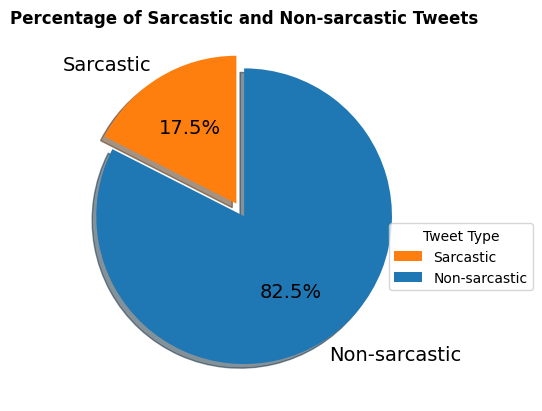

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate the percentage of sarcastic and non-sarcastic tweets
total_tweets = len(data)
num_sarcastic = data["sarcasm"].sum()
num_non_sarcastic = total_tweets - num_sarcastic
percent_sarcastic_tweets = (num_sarcastic / total_tweets) * 100
percent_non_sarcastic_tweets = (num_non_sarcastic / total_tweets) * 100

# Create a pie chart to show the percentage of sarcastic and non-sarcastic tweets
labels = ["Sarcastic", "Non-sarcastic"]
sizes = [percent_sarcastic_tweets, percent_non_sarcastic_tweets]
colors = ["tab:orange", "tab:blue"]
explode = (0.1, 0)
textprops = {"fontsize": 14}
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', textprops=textprops, shadow=True, startangle=90)

# Add a title to the chart
plt.title("Percentage of Sarcastic and Non-sarcastic Tweets", fontsize=12, fontweight="bold")

# Add legend
plt.legend(title="Tweet Type", loc="upper right", bbox_to_anchor=(1.3, 0.5))

# Show the chart
plt.show()

# save
plt.savefig("precentage of sarcastic and non-sarcastic tweets.png")

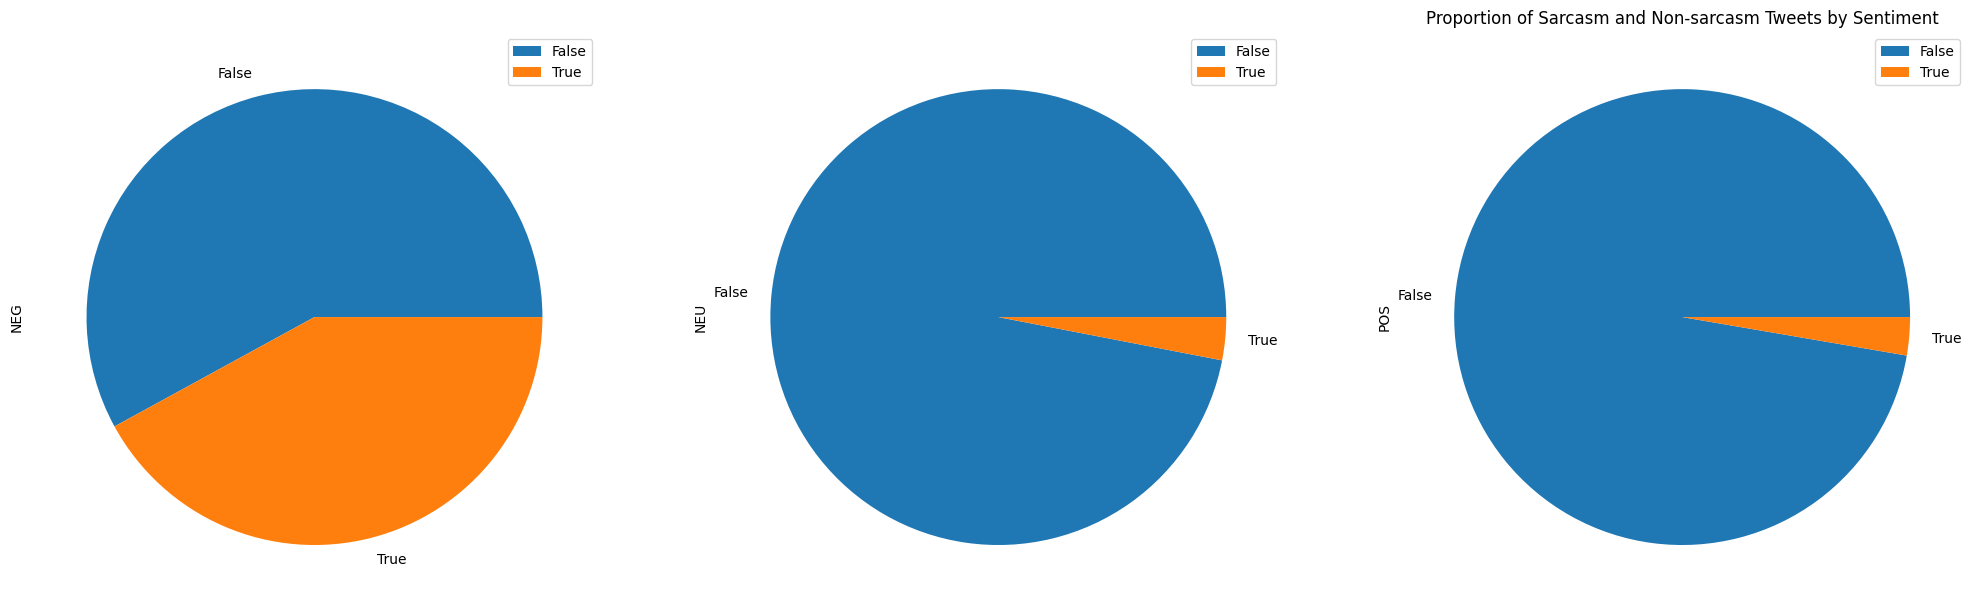

In [ ]:
# Group the data by sarcasm and sentiment
grouped_data = data.groupby(["sarcasm", "sentiment"])

# Calculate the number of tweets in each group
num_tweets = grouped_data.size().unstack()

# Create pie chart
num_tweets.plot(kind="pie", subplots=True, figsize=(25, 20))

# Add title to the chart
plt.title("Proportion of Sarcasm and Non-sarcasm Tweets by Sentiment")

# Show the chart
plt.show()

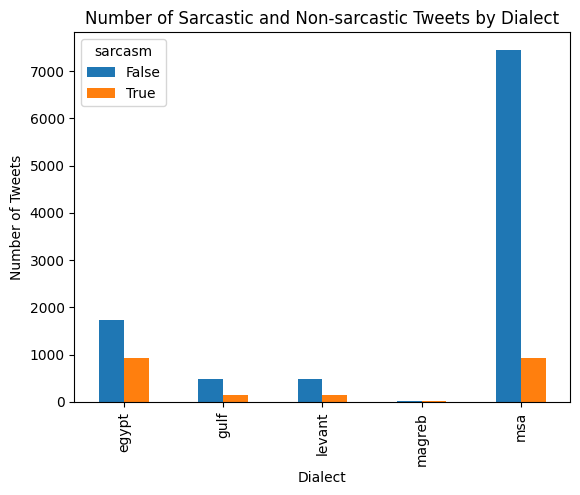

In [ ]:
# Group the data by dialect and sarcasm
grouped_data = data.groupby(["dialect", "sarcasm"])

# Calculate the number of tweets in each group
num_tweets = grouped_data.size().unstack()

# Create bar chart
num_tweets.plot(kind="bar")

# Add labels and title to the chart
plt.xlabel("Dialect")
plt.ylabel("Number of Tweets")
plt.title("Number of Sarcastic and Non-sarcastic Tweets by Dialect")

# Show the chart
plt.show()

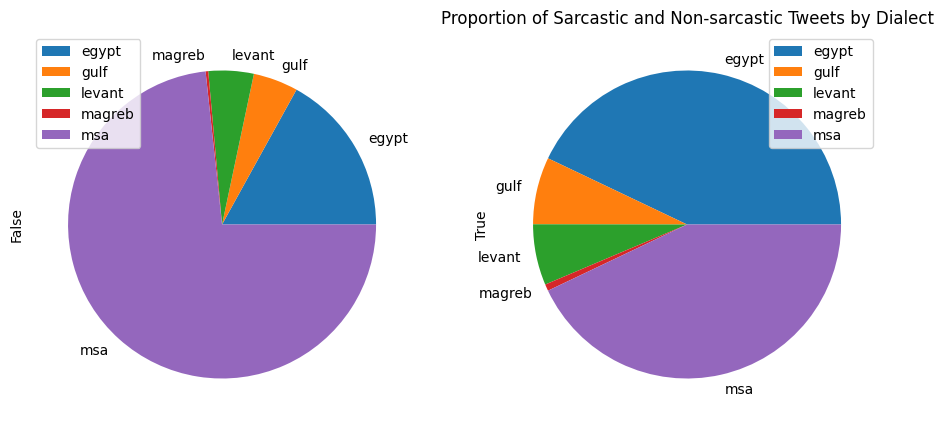

In [ ]:
# Group the data by dialect and sarcasm
grouped_data = data.groupby(["dialect", "sarcasm"])

# Calculate the number of tweets in each group
num_tweets = grouped_data.size().unstack()

# Create pie chart
num_tweets.plot(kind="pie", subplots=True, figsize=(11, 5))

# Add title to the chart
plt.title("Proportion of Sarcastic and Non-sarcastic Tweets by Dialect")

# Show the chart
plt.show()

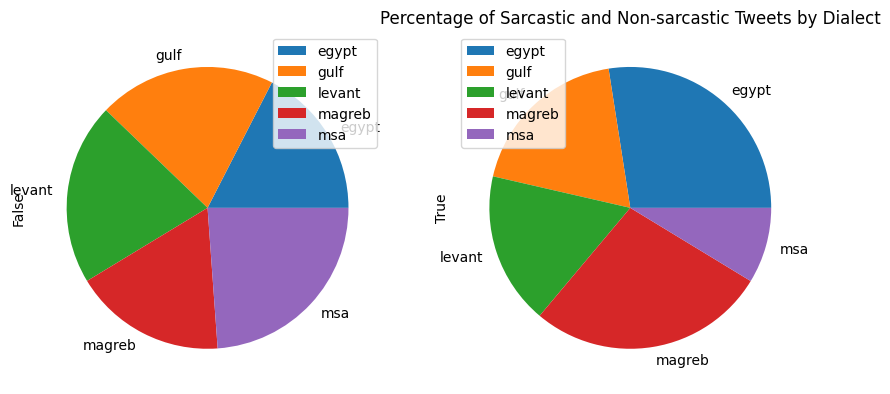

In [ ]:
# Group the data by dialect and sarcasm
grouped_data = data.groupby(["dialect", "sarcasm"])

# Calculate the number of tweets in each group
num_tweets = grouped_data.size().unstack()

# Calculate the percentage of sarcastic and non-sarcastic tweets for each dialect
percentage_tweets = num_tweets.apply(lambda x: x/x.sum()*100, axis=1)

# Create pie chart
percentage_tweets.plot(kind="pie", subplots=True, figsize=(10, 5))

# Add title to the chart
plt.title("Percentage of Sarcastic and Non-sarcastic Tweets by Dialect")

# Show the chart
plt.show()

<ipython-input-12-5dcac8358c45>:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  percentage_tweets.plot(kind="pie", subplots=True, autopct="%1.1f%%", pctdistance=0.75, colors=colors, textprops={"fontsize": 11}, startangle=90, ax=ax)


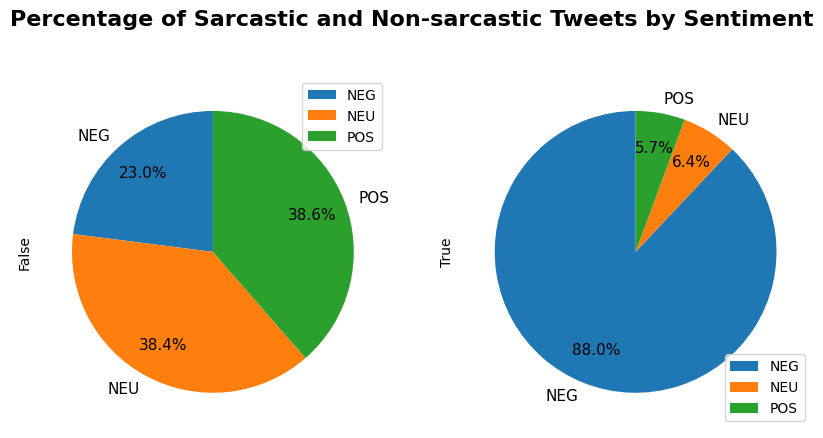

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define custom colors for each section
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Group the data by sentiment and sarcasm
grouped_data = data.groupby(["sentiment", "sarcasm"])

# Calculate the number of tweets in each group
num_tweets = grouped_data.size().unstack()

# Calculate the percentage of sarcastic and non-sarcastic tweets for each sentiment
percentage_tweets = num_tweets.apply(lambda x: x/x.sum()*100, axis=1)

# Create pie chart with custom colors
fig, ax = plt.subplots(figsize=(10, 5))
percentage_tweets.plot(kind="pie", subplots=True, autopct="%1.1f%%", pctdistance=0.75, colors=colors, textprops={"fontsize": 11}, startangle=90, ax=ax)

# Add title to the chart
fig.suptitle("Percentage of Sarcastic and Non-sarcastic Tweets by Sentiment", fontsize=16, fontweight="bold")

# Add legend
ax.legend(title="Sarcasm", loc="best")

# Show the chart
plt.show()

plt.savefig("Percentage of Sarcastic and Non-sarcastic Tweets by Sentiment.png")

In [ ]:
# Group the data by dialect and sarcasm
grouped_data = data.groupby(["sarcasm", "dialect"])

# Calculate the number of tweets in each group
num_tweets = grouped_data.size().unstack()

# Calculate the percentage of sarcastic and non-sarcastic tweets for each dialect
percentage_tweets = num_tweets.apply(lambda x: x/x.sum()*100, axis=1)

# Print the percentage of sarcastic and non-sarcastic tweets for each dialect
print(percentage_tweets)

dialect      egypt      gulf    levant    magreb        msa
sarcasm                                                    
False    16.969995  4.712248  4.751599  0.275455  73.290703
True     42.929995  7.046824  6.397775  0.695410  42.929995


In [ ]:
grouped_data.head()

,Unnamed: 0,sarcasm,sentiment,dialect,cleaned_tweet
0,3128,False,POS,msa,اسماء شهداء ثور المجدللشهداء ريتوي تير جد قى
1,1839,False,NEU,egypt,جبر إنس خير كفي عقل يحير لي نهارده يطلب شتهي ل...
2,1327,False,NEG,egypt,ميس قليل دب مدرب حط خط دفاع ضرب تمرير حد
3,11337,True,NEG,gulf,جنس مختلف جامع عرب شف شيء سيطر تام مسمى مك اشتراك
4,7738,False,NEG,msa,ساويرس طالب منع مظاهر منتهى وقاح حد كبر لصوص ف...
5,3834,False,NEG,msa,عباد قصف ردوغا صاروخ رض رض
6,7811,True,NEG,egypt,دي نبى برادعى لى قال هنعمل مصالح شتغل اسطوان خ...
7,4084,False,NEU,msa,خبار دور اسبان إصاب ضرب حارس مرمى رشلون إسبان
8,5605,False,NEU,egypt,مازو في في مواقع ثان بيع نص سعر لعب رسم
9,5460,False,NEG,msa,موحرام طلاب جامع خاص يفصفص زر حنا ماعم نام ليل...


In [ ]:
percentage_tweets

dialect,egypt,gulf,levant,magreb,msa
sarcasm,,,,,
False,16.969995,4.712248,4.751599,0.275455,73.290703
True,42.929995,7.046824,6.397775,0.695410,42.929995


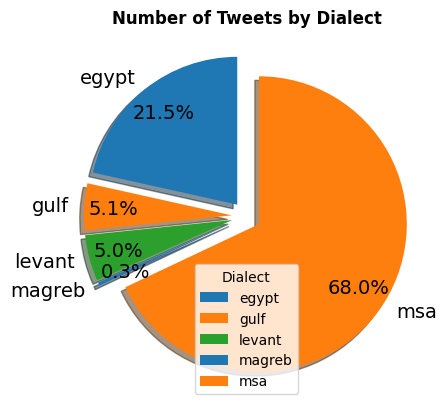

In [ ]:
# Group the data by dialect
grouped_data = data.groupby("dialect")

# Calculate the number of tweets in each group
num_tweets = grouped_data.size()

# Create pie chart
labels = num_tweets.index.tolist()
sizes = num_tweets.values.tolist()
colors = ["tab:blue", "tab:orange", "tab:green"]
explode = [0.1] * len(labels)  # Set the same explosion value for each section
textprops = {"fontsize": 14}
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True, startangle=90, pctdistance=0.8)

# Add title to the chart
plt.title("Number of Tweets by Dialect", fontsize=12, fontweight="bold")

# Add legend
plt.legend(title="Dialect", loc="best")

# Show the chart
plt.show()

## data transformations

In [ ]:
# read data from csv file
data_train = pd.read_csv('/content/drive/MyDrive/sarcasm detection/ArSarcasm-v2/cleaned_sarcasam_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/sarcasm detection/ArSarcasm-v2/cleaned_sarcasam_test.csv')

# convert positive and negative to numerical
data_train['sarcasm'] = data_train['sarcasm'].astype('int')
data_test['sarcasm'] = data_test['sarcasm'].astype('int')
unique_values = data_train['sarcasm'].unique()
print(unique_values)

[0 1]


In [ ]:
# تحويل المتغيرات الفئوية إلى ترميز رقمي باستخدام LabelEncoder
label_encoder = LabelEncoder()
data_train['sarcasm'] = label_encoder.fit_transform(data_train['sarcasm'])
data_train['sentiment'] = label_encoder.fit_transform(data_train['sentiment'])
data_train['dialect'] = label_encoder.fit_transform(data_train['dialect'])
data_test['sarcasm'] = label_encoder.fit_transform(data_test['sarcasm'])
data_test['sentiment'] = label_encoder.fit_transform(data_test['sentiment'])
data_test['dialect'] = label_encoder.fit_transform(data_test['dialect'])
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)
data_train.head(20)

,Unnamed: 0,sarcasm,sentiment,dialect,cleaned_tweet
0,3128,0,2,4,اسماء شهداء ثور المجدللشهداء ريتوي تير جد قى
1,1839,0,1,0,جبر إنس خير كفي عقل يحير لي نهارده يطلب شتهي ل...
2,1327,0,0,0,ميس قليل دب مدرب حط خط دفاع ضرب تمرير حد
3,11337,1,0,1,جنس مختلف جامع عرب شف شيء سيطر تام مسمى مك اشتراك
4,7738,0,0,4,ساويرس طالب منع مظاهر منتهى وقاح حد كبر لصوص ف...
5,3834,0,0,4,عباد قصف ردوغا صاروخ رض رض
6,7811,1,0,0,دي نبى برادعى لى قال هنعمل مصالح شتغل اسطوان خ...
7,4084,0,1,4,خبار دور اسبان إصاب ضرب حارس مرمى رشلون إسبان
8,5605,0,1,0,مازو في في مواقع ثان بيع نص سعر لعب رسم
9,5460,0,0,4,موحرام طلاب جامع خاص يفصفص زر حنا ماعم نام ليل...


In [ ]:
data_train.drop("Unnamed: 0", axis=1, inplace=True)
data_test.drop("Unnamed: 0", axis=1, inplace=True)
data_train.head()

,sarcasm,sentiment,dialect,cleaned_tweet
0,0,2,4,اسماء شهداء ثور المجدللشهداء ريتوي تير جد قى
1,0,1,0,جبر إنس خير كفي عقل يحير لي نهارده يطلب شتهي ل...
2,0,0,0,ميس قليل دب مدرب حط خط دفاع ضرب تمرير حد
3,1,0,1,جنس مختلف جامع عرب شف شيء سيطر تام مسمى مك اشتراك
4,0,0,4,ساويرس طالب منع مظاهر منتهى وقاح حد كبر لصوص ف...
